In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

In [2]:
on_new = pd.read_csv("Data/on_covid19.csv")
on_events = pd.read_csv("Data/on_events.csv")
on_mobil = pd.read_csv("Data/ontario.csv")

In [3]:
on_new.head()

,category,New cases
0,2020-01-30T00:00:00,1
1,2020-01-31T00:00:00,0
2,2020-02-03T00:00:00,1
3,2020-02-04T00:00:00,0
4,2020-02-05T00:00:00,0


In [4]:
on_new.columns = ["date", "new"]

In [5]:
type(on_new["date"][1])

str

In [6]:
max(on_new.date)

'2020-10-04T00:00:00'

In [7]:
on_new = on_new.assign(date = lambda x: x['date'].map(lambda d: d[:10]))
#on_new['date'] = [d[:10] for d in on_new.date.values]

In [8]:
on_new.head()

,date,new
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-03,1
3,2020-02-04,0
4,2020-02-05,0


In [9]:
first_date = min(on_new.date.values)
last_date = max(on_new.date.values)
in_btw_dates = pd.date_range(start=first_date, end=last_date).values

In [10]:
in_btw_dates = [str(d)[:10] for d in in_btw_dates]

In [11]:
len(in_btw_dates)

249

In [12]:
on_new.shape

(239, 2)

In [13]:
dates = pd.DataFrame({'date':in_btw_dates})
on_new = on_new.merge(right=dates, how='right', on='date')

In [14]:
on_new.shape

(249, 2)

In [15]:
pd.isnull(on_new).sum()

date     0
new     10
dtype: int64

In [16]:
on_new = on_new.fillna(value=0)

In [17]:
pd.isnull(on_new).sum()

date    0
new     0
dtype: int64

In [18]:
on_mobil.head()

,province,region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Ontario,Algoma District,2020-02-15,0.0,0.0,23.0,8.0,-2.0,0.0
1,Ontario,Algoma District,2020-02-16,5.0,-1.0,NaN,-3.0,-5.0,0.0
2,Ontario,Algoma District,2020-02-17,-51.0,-66.0,NaN,-28.0,-66.0,12.0
3,Ontario,Algoma District,2020-02-18,-10.0,3.0,-16.0,-4.0,-4.0,3.0
4,Ontario,Algoma District,2020-02-19,3.0,-1.0,-6.0,-1.0,0.0,1.0


In [19]:
# get unique regions
np.unique(on_mobil.region.values, return_counts=True)

(array(['Algoma District', 'Brant County', 'Brantford', 'Bruce County',
        'Chatham-Kent Division', 'Cochrane District', 'Dufferin County',
        'Elgin County', 'Essex County', 'Frontenac County',
        'Greater Sudbury Division', 'Grey County', 'Haldimand County',
        'Haliburton County', 'Hamilton Division', 'Hastings County',
        'Huron County', 'Kawartha Lakes Division', 'Kenora District',
        'Lambton County', 'Lanark County',
        'Leeds and Grenville United Counties',
        'Lennox and Addington County', 'Manitoulin District',
        'Middlesex County', 'Muskoka District Municipality',
        'Nipissing District', 'Norfolk County', 'Northumberland County',
        'Ottawa Division', 'Oxford County', 'Parry Sound District',
        'Perth County', 'Peterborough County',
        'Prescott and Russell United Counties', 'Prince Edward County',
        'Rainy River District', 'Regional Municipality of Durham',
        'Regional Municipality of Halton',
  

In [20]:
len(np.unique(on_mobil.date.values))

235

In [21]:
on_mobil_mean = on_mobil.groupby(['date', 'province']).agg(
    mean_retail_change = pd.NamedAgg(column='retail_and_recreation_percent_change_from_baseline', aggfunc=np.mean),
    mean_grocery_change = pd.NamedAgg(column='grocery_and_pharmacy_percent_change_from_baseline', aggfunc=np.mean),
    mean_parks_change = pd.NamedAgg(column='parks_percent_change_from_baseline', aggfunc=np.mean),
    mean_transit_change = pd.NamedAgg(column='transit_stations_percent_change_from_baseline', aggfunc=np.mean),
    mean_workplace_change = pd.NamedAgg(column='workplaces_percent_change_from_baseline', aggfunc=np.mean),
    mean_residential_change = pd.NamedAgg(column='residential_percent_change_from_baseline', aggfunc=np.mean)
)

In [22]:
on_mobil_mean = on_mobil_mean.reset_index()

In [23]:
print(on_mobil_mean.date.min())
print(on_mobil_mean.date.max())

2020-02-15
2020-10-06


In [24]:
diff = datetime.date(datetime.strptime(on_mobil_mean.date.max(), "%Y-%m-%d")) - \
datetime.date(datetime.strptime(on_mobil_mean.date.min(), "%Y-%m-%d"))

In [25]:
diff.days

234

In [26]:
datetime.date(datetime.strptime(on_mobil_mean.date.min(), "%Y-%m-%d")) + timedelta(days=234)

datetime.date(2020, 10, 6)

In [27]:
# left join new cases onto mobil_mean
data = on_mobil_mean.merge(right=on_new, how='left', on='date')

In [28]:
data.head(20)

,date,province,mean_retail_change,mean_grocery_change,mean_parks_change,mean_transit_change,mean_workplace_change,mean_residential_change,new
0,2020-02-15,Ontario,6.466667,4.674419,24.333333,23.724138,1.767442,-1.000000,0.0
1,2020-02-16,Ontario,15.555556,15.452381,46.368421,6.678571,-1.595238,-2.291667,0.0
2,2020-02-17,Ontario,-25.545455,-43.250000,67.333333,-4.827586,-67.725490,14.454545,0.0
3,2020-02-18,Ontario,-2.822222,11.777778,-8.600000,0.310345,-1.125000,1.266667,0.0
4,2020-02-19,Ontario,-0.466667,4.111111,-4.538462,0.758621,1.375000,0.533333,0.0
5,2020-02-20,Ontario,5.311111,6.822222,0.652174,1.034483,2.395833,-0.288889,0.0
6,2020-02-21,Ontario,0.913043,-2.377778,3.629630,1.344828,-6.187500,1.466667,0.0
7,2020-02-22,Ontario,10.977778,7.000000,45.826087,18.620690,7.255814,-2.035714,0.0
8,2020-02-23,Ontario,12.933333,8.095238,50.100000,14.785714,4.804878,-1.541667,0.0
9,2020-02-24,Ontario,2.000000,3.311111,14.200000,2.724138,2.729167,-0.022222,1.0


In [29]:
# create 3 day and 5 day moving averages
# shift the moving average down 3 and 5 respectively and drop NA rows at the tail
data['1d_lag'] = data['new'].shift(-1)
data['3d_SMA'] = data['1d_lag'].rolling(window=3).mean().shift(-2)
data['5d_SMA'] = data['1d_lag'].rolling(window=5).mean().shift(-4)
data['3d_SMA_14d_lag'] = data['new'].shift(-1)

# auto-correlation investigation

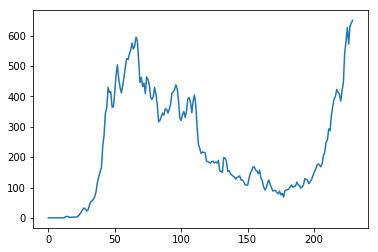

In [30]:
data['3d_SMA'].plot()

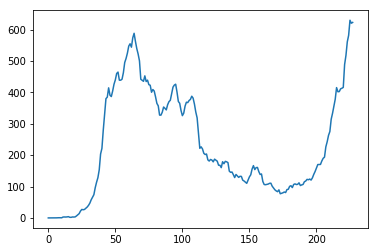

In [31]:
data['5d_SMA'].plot()

In [32]:
data.head()

,date,province,mean_retail_change,mean_grocery_change,mean_parks_change,mean_transit_change,mean_workplace_change,mean_residential_change,new,1d_lag,3d_SMA,5d_SMA,3d_SMA_14d_lag
0,2020-02-15,Ontario,6.466667,4.674419,24.333333,23.724138,1.767442,-1.000000,0.0,0.0,0.0,0.0,0.0
1,2020-02-16,Ontario,15.555556,15.452381,46.368421,6.678571,-1.595238,-2.291667,0.0,0.0,0.0,0.0,0.0
2,2020-02-17,Ontario,-25.545455,-43.250000,67.333333,-4.827586,-67.725490,14.454545,0.0,0.0,0.0,0.0,0.0
3,2020-02-18,Ontario,-2.822222,11.777778,-8.600000,0.310345,-1.125000,1.266667,0.0,0.0,0.0,0.0,0.0
4,2020-02-19,Ontario,-0.466667,4.111111,-4.538462,0.758621,1.375000,0.533333,0.0,0.0,0.0,0.2,0.0


In [33]:
data.isnull().sum()

date                       0
province                   0
mean_retail_change         0
mean_grocery_change        0
mean_parks_change          0
mean_transit_change        0
mean_workplace_change      0
mean_residential_change    0
new                        2
1d_lag                     3
3d_SMA                     5
5d_SMA                     7
3d_SMA_14d_lag             3
dtype: int64

In [34]:
data.tail(7).isnull().sum()

date                       0
province                   0
mean_retail_change         0
mean_grocery_change        0
mean_parks_change          0
mean_transit_change        0
mean_workplace_change      0
mean_residential_change    0
new                        2
1d_lag                     3
3d_SMA                     5
5d_SMA                     7
3d_SMA_14d_lag             3
dtype: int64

In [35]:
data = data.dropna()

In [36]:
data.isnull().sum()

date                       0
province                   0
mean_retail_change         0
mean_grocery_change        0
mean_parks_change          0
mean_transit_change        0
mean_workplace_change      0
mean_residential_change    0
new                        0
1d_lag                     0
3d_SMA                     0
5d_SMA                     0
3d_SMA_14d_lag             0
dtype: int64

In [37]:
data = data.reset_index()

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
X = data[['index', 'mean_retail_change', 'mean_grocery_change', 'mean_parks_change', \
         'mean_transit_change', 'mean_workplace_change', 'mean_residential_change']]
y_new = data['new']
y_3d_sma = data['3d_SMA']
y_5d_sma = data['5d_SMA']

# fit to new
model_new = LinearRegression()
model_new.fit(X,y_new)

# fit to 3d sma
model_3d = LinearRegression()
model_3d.fit(X,y_3d_sma)

# fit to 5d sma
model_5d = LinearRegression()
model_5d.fit(X,y_5d_sma)

LinearRegression()

In [40]:
print("model_new has R2:",model_new.score(X, y_new))
print("model_3d has R2:",model_3d.score(X, y_3d_sma))
print("model_5d has R2:",model_5d.score(X, y_5d_sma))

model_new has R2: 0.5867772108283704
model_3d has R2: 0.6236913891831168
model_5d has R2: 0.6418469704140596


In [41]:
from statsmodels.api import OLS
OLS(y_new,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    new   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              178.6
Date:                Sun, 18 Oct 2020   Prob (F-statistic):                    2.79e-87
Time:                        08:45:11   Log-Likelihood:                         -1392.6
No. Observations:                 228   AIC:                                      2799.
Df Residuals:                     221   BIC:                                      2823.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
index                       0.9308      0.255      3.647      0.000       0.428       1.434
mean_retail_change         -1.2280      1.691     -0.726      0.469      -4.561       2.105
mean_grocery_change        -1.0574      0.996     -1.061      0.290      -3.021       0.906
mean_parks_change           0.1002      0.211      0.475      0.635      -0.315       0.516
mean_transit_change        -2.9989      1.527     -1.964      0.051      -6.008       0.011
mean_workplace_change       9.7987      1.311      7.473      0.000       7.215      12.383
mean_residential_change    30.3296      4.100      7.398      0.000      22.250      38.409
==============================================================================
Omnibus:                        3.760   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.797
Skew:                           0.172   Prob(JB):                        0.150
Kurtosis:                       3.530   Cond. No.                         94.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# try splitting into train test
from sklearn.model_selection import train_test_split


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y_new, test_size=0.3, random_state=23)
X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(X, y_3d_sma, test_size=0.3, random_state=23)
X_train_5d, X_test_5d, y_train_5d, y_test_5d = train_test_split(X, y_5d_sma, test_size=0.3, random_state=23)

In [43]:
# check new performance
from sklearn.metrics import mean_squared_error
m1_new = LinearRegression()
m1_new.fit(X_train_new, y_train_new)
m1_new_pred = m1_new.predict(X_test_new)
m1_new_pred_train = m1_new.predict(X_train_new)

m1_3d = LinearRegression()
m1_3d.fit(X_train_3d, y_train_3d)
m1_3d_pred = m1_3d.predict(X_test_3d)
m1_3d_pred_train = m1_3d.predict(X_train_3d)

m1_5d = LinearRegression()
m1_5d.fit(X_train_5d, y_train_5d)
m1_5d_pred = m1_5d.predict(X_test_5d)
m1_5d_pred_train = m1_5d.predict(X_train_5d)

# we will use rmse to evaluate model performance
print('m1_new')
print('training rmse:', mean_squared_error(m1_new_pred_train, y_train_new, squared=False))
print('test rmse:', mean_squared_error(m1_new_pred, y_test_new)**0.5)

print('m1_3d')
print('training rmse:', mean_squared_error(m1_3d_pred_train, y_train_3d, squared=False))
print('test rmse:', mean_squared_error(m1_3d_pred, y_test_3d, squared=False))

print('m1_5d')
print('training rmse:', mean_squared_error(m1_5d_pred_train, y_train_5d, squared=False))
print('test rmse:', mean_squared_error(m1_5d_pred, y_test_5d, squared=False))






m1_new
training rmse: 106.8890914898478
test rmse: 113.450207074951
m1_3d
training rmse: 103.48217664109609
test rmse: 103.73874663881357
m1_5d
training rmse: 100.94234079688711
test rmse: 101.35697741781462


This means that our predictions are off by a margin of $\pm 100$ cases on average

In [44]:
results = pd.DataFrame({'new_pred':m1_new_pred, 'new_actual':y_test_new, \
                        '3d_pred':m1_3d_pred, '3d_actual':y_test_3d, \
                        '5d_pred':m1_5d_pred, '5d_actual':y_test_5d}).reset_index(drop=True)
results.head(20)

,new_pred,new_actual,3d_pred,3d_actual,5d_pred,5d_actual
0,343.100051,525.0,351.559285,409.000000,359.984569,434.4
1,203.822596,105.0,222.901124,102.000000,234.931259,115.2
2,237.341643,197.0,236.607651,185.000000,238.447646,181.2
3,267.141255,203.0,265.606751,215.000000,267.189643,202.0
4,393.813698,351.0,407.441721,362.333333,420.444777,384.8
5,363.141591,426.0,368.387666,412.666667,377.535812,391.0
6,337.538720,424.0,345.888948,443.666667,355.066826,452.6
7,381.923299,309.0,391.874467,470.666667,403.296795,460.2
8,193.431102,129.0,192.445929,109.666667,192.481403,110.2
9,368.669109,399.0,375.683952,372.333333,383.003409,357.2


### Check for auto-correlation in the response

In [45]:
import statsmodels.api as sm

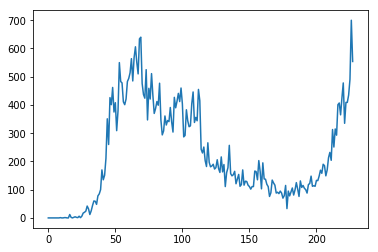

In [46]:
plt.plot(data['new'])

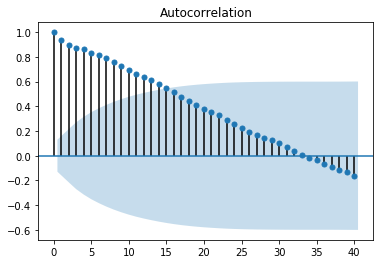

In [47]:
sm.graphics.tsa.plot_acf(data['new'], lags=40)
plt.show()

The correlation between 2 points diminishes as the time between the points increases

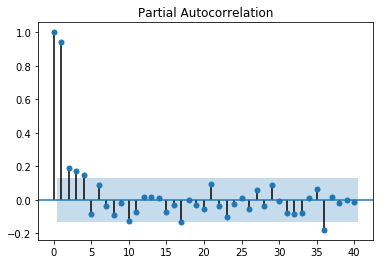

In [48]:
sm.graphics.tsa.plot_pacf(data['new'], lags=40)
plt.show()

After lag 4, the correlation is no longer statistically significant. This suggests that with the previous 4 day counts, we can predict the number of new cases on the 5th day. 

#### Hypotheses to Explore
Be careful not to use SMA data to predict one of the points in the SMA.

1. Try a bunch of different lags with a 3d SMA and see which day gives the best performance.
2. Try using mobility for day t with counts for day t, t+1, t+2, and t+3 to predict t+4.

1. lag of reporting per province
2. lag of environment to onset (mobility -> onset)
3. lag of onset to reporting

In [49]:
# try lag 0 to lag 20 (up to 3 weeks)
max_lag = 21

data2 = data.copy()

# 3d_SMA is lag 0
for i in range(1,max_lag):
    data2["lag_"+str(i)] = data['3d_SMA'].shift(-i)
    


In [50]:
data2 = data2.dropna()

In [51]:
np.random.seed(23)

In [52]:
X2 = data2[['index', 'mean_retail_change', 'mean_grocery_change', 
            'mean_parks_change', 'mean_transit_change',
            'mean_workplace_change', 'mean_residential_change']]

lag_results = list()

for i in range(1,max_lag):
    #print('predicting:',"lag_"+str(i))
    name = "lag_"+str(i)
    target = data2[name]
    temp_model = LinearRegression()
    temp_model.fit(X2, target)
    R2 = temp_model.score(X2, target)
    lag_results.append(R2)
    #print("R2", R2)

lag_res_df = pd.DataFrame({'lag':np.array(range(1,max_lag)), 'R2': lag_results})
lag_res_df


,lag,R2
0,1,0.724061
1,2,0.748467
2,3,0.775463
3,4,0.799781
4,5,0.817607
5,6,0.830104
6,7,0.836798
7,8,0.847311
8,9,0.852135
9,10,0.848698


Lag 7 to 11 are good, with lag 9 being the best predicted.

#### Improvements to hypothesis 2:
- we can add case counts for the 3-4 days leading up to the predicted lag time.
- this can get tricky with the smoothing (we do not want to overlap explanatory new cases and predicted new cases), so we can redo hypothesis 1 without using the 3 day smoothed new case count.
- alternatively, we could only attach new case counts for days -3 to -6

In [53]:
can2 = pd.read_csv('Data/data_can2.csv')

In [54]:
can2.head()

,date,key_apple_mobility,key_google_mobility,id,tests,confirmed,recovered,deaths,hosp,vent,...,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,driving,walking,transit
0,2020-03-11,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.0,0,NaN,0,NaN,NaN,...,NaN,-1.0,0.0,NaN,NaN,0.0,1.0,112.23,NaN,NaN
1,2020-03-12,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.0,0,NaN,0,NaN,NaN,...,NaN,8.0,16.0,NaN,NaN,0.0,0.0,107.63,NaN,NaN
2,2020-03-13,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.0,0,NaN,0,NaN,NaN,...,NaN,-5.0,35.0,NaN,NaN,-3.0,3.0,108.80,NaN,NaN
3,2020-03-14,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.0,0,NaN,0,NaN,NaN,...,NaN,-17.0,11.0,NaN,NaN,-4.0,NaN,104.16,NaN,NaN
4,2020-03-15,Prince Edward Island,"CA, Prince Edward Island",015d95fc,6.0,1,NaN,0,NaN,NaN,...,NaN,-3.0,18.0,NaN,NaN,2.0,NaN,77.46,NaN,NaN


In [55]:
can2.shape

(2862, 49)

In [56]:
np.unique(can2['key_google_mobility'].values)

array(['CA, Alberta', 'CA, British Columbia', 'CA, Manitoba',
       'CA, New Brunswick', 'CA, Newfoundland and Labrador',
       'CA, Northwest Territories', 'CA, Nova Scotia', 'CA, Nunavut',
       'CA, Ontario', 'CA, Prince Edward Island', 'CA, Quebec',
       'CA, Saskatchewan', 'CA, Yukon'], dtype=object)

In [57]:
on2 = can2[can2['key_google_mobility'] == 'CA, Ontario']

In [58]:
can2.columns

Index(['date', 'key_apple_mobility', 'key_google_mobility', 'id', 'tests',
       'confirmed', 'recovered', 'deaths', 'hosp', 'vent', 'icu', 'population',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'stringency_index', 'iso_alpha_3',
       'iso_alpha_2', 'iso_numeric', 'currency', 'administrative_area_level',
       'administrative_area_level_1', 'administrative_area_level_2',
       'administrative_area_level_3', 'latitude', 'longitude', 'key',
       'key_alpha_2', 'key_numeric', 'metro_area', 'iso_3166_2_code',
       'census_fips_code',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_perce

In [59]:
on2.shape

(233, 49)

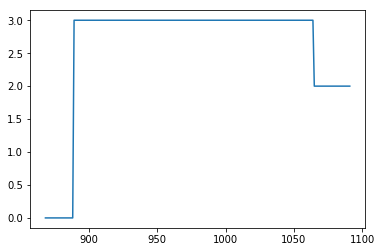

In [60]:
on2.school_closing.plot()

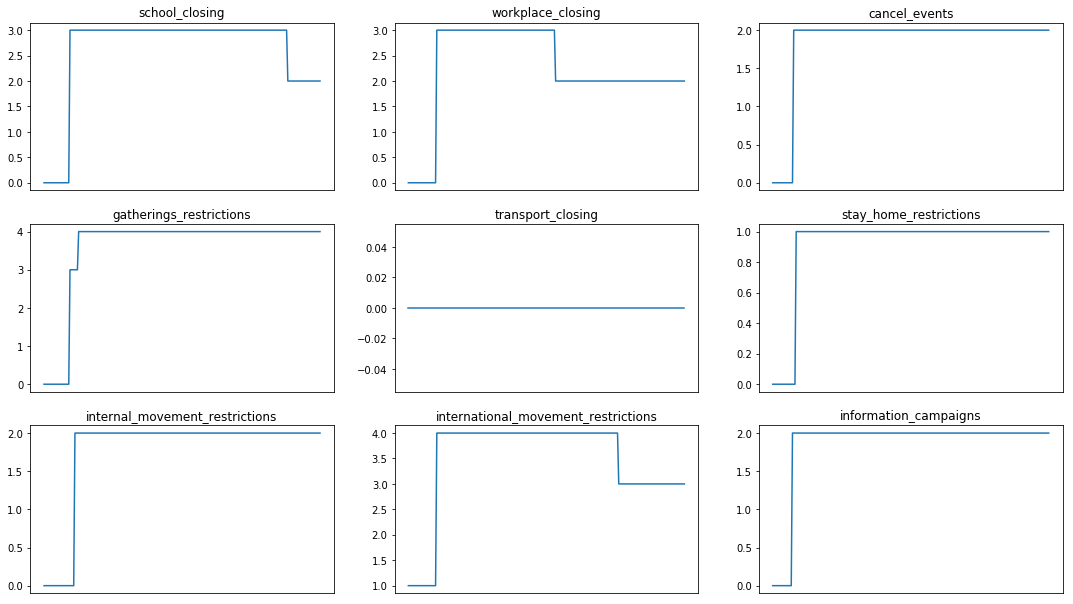

In [61]:
from matplotlib.pyplot import figure
lockdown_procs = ['school_closing', 'workplace_closing', 'cancel_events',
 'gatherings_restrictions', 'transport_closing',
 'stay_home_restrictions', 'internal_movement_restrictions',
 'international_movement_restrictions', 'information_campaigns']


#figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)
x = on2['date']
for i, proc in enumerate(lockdown_procs):
    a = i//3
    b = i%3
    y = on2[proc]
    axs[a,b].plot(x.values,y.values)
    axs[a,b].set_title(proc)
    axs[a,b].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
plt.show()
    

In [71]:
# check for correlation between lockdown procedures and case count
temp = lockdown_procs+['new']

on2['new'] = on2['confirmed'].shift(-14).values - on2['confirmed'].values


on2[temp].corr()

/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,new
school_closing,1.000000,0.819194,0.830990,0.918324,NaN,0.882788,0.837906,0.893071,0.804239,0.282166
workplace_closing,0.819194,1.000000,0.717060,0.805183,NaN,0.761756,0.791130,0.894532,0.693976,0.600926
cancel_events,0.830990,0.717060,1.000000,0.881106,NaN,0.941325,0.808529,0.755774,0.967808,0.418098
gatherings_restrictions,0.918324,0.805183,0.881106,1.000000,NaN,0.936028,0.944209,0.854969,0.852741,0.460294
transport_closing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stay_home_restrictions,0.882788,0.761756,0.941325,0.936028,NaN,1.000000,0.858927,0.802884,0.911021,0.435397
internal_movement_restrictions,0.837906,0.791130,0.808529,0.944209,NaN,0.858927,1.000000,0.843218,0.782501,0.454541
international_movement_restrictions,0.893071,0.894532,0.755774,0.854969,NaN,0.802884,0.843218,1.000000,0.731444,0.374651
information_campaigns,0.804239,0.693976,0.967808,0.852741,NaN,0.911021,0.782501,0.731444,1.000000,0.407792
new,0.282166,0.600926,0.418098,0.460294,NaN,0.435397,0.454541,0.374651,0.407792,1.000000


New cases for the next week

In [74]:
on2.shape[0]

33.285714285714285

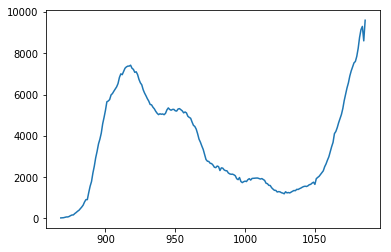

In [72]:
on2.new.plot()

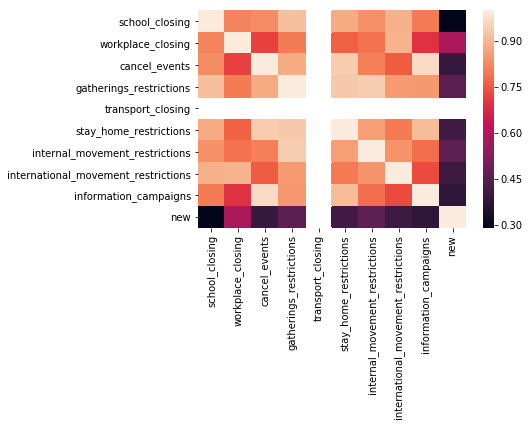

In [64]:
import seaborn as sns

sns.heatmap(on2[temp].corr())

Can use all except transport_closing (no changes)

In [65]:
on2_sub = on2

SyntaxError: invalid syntax (<ipython-input-65-344b4de39818>, line 1)